We start this notebook by typing a "magic" command that allows iPython notebooks to display plots directly in the browser.

In [1]:
# Render our plots inline
%matplotlib inline

In order to read and process files, we are going to use a very powerful, and widely used Python library, called pandas. So, our next step is to import the pandas library in Python, and also import the library matplotlib for generating plots:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

Pandas should already be installed on your machine, but if you get an error in the import statement above, indicating that pandas is not available, please go to the Unix shell and type:

`sudo pip install -U pandas`

It will take a few minutes to get everything installed.

And we type some code to simply change the visual style of the plots. (The code below is optional and not necessary, and for now you do not need to understand what exactly is happening.)

In [3]:
# Make the graphs a bit bigger
plt.rcParams['figure.figsize'] = (15, 5)

Let's take a look at the restaurant inspections file (at `data/restaurants.csv`), which we used in our earlier classes.

If you do not have it, then uncomment and execute the following:

In [15]:
!curl 'https://data.cityofnewyork.us/api/views/43nn-pn8j/rows.csv?accessType=DOWNLOAD' -o data/restaurant.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  152M    0  152M    0     0  4193k      0 --:--:--  0:00:37 --:--:-- 4040k
gzip: data/restaurant.csv.gz already exists; do you wish to overwrite (y or n)? ^C


In [18]:
!rm data/restaurant.csv.gz
!gzip data/restaurant.csv

In [19]:
!gzip -cd data/restaurant.csv.gz | head -3

CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
41124964,NEBRASKA STEAKHOUSE,MANHATTAN,15,STONE STREET,10004,2129520620,Steak,11/09/2016,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facility's food and/or non-food areas.,Critical,25,Z,11/09/2016,11/30/2016,Cycle Inspection / Re-inspection
41687706,SAL'S PIZZA,QUEENS,2007,127 STREET,11356,7189393900,Italian,08/15/2016,Violations were cited in the following area(s).,04C,Food worker does not use proper utensil to eliminate bare hand contact with food that will not receive adequate additional heat treatment.,Critical,27,,,11/30/2016,Cycle Inspection / Initial Inspection

gzip: stdout: Broken pipe


### Reading a CSV file

We want to be able to read and process this file within Python. The pandas library has a very convenient method `read_csv` which reads the file, and returns back a variable that contains its contents.

In [20]:
import pandas as pd
restaurants = pd.read_csv("data/restaurant.csv.gz", encoding="utf-8", dtype="unicode")

When you read a CSV, you get back a kind of object called a DataFrame, which is made up of rows and columns. You get columns out of a DataFrame the same way you get elements out of a dictionary. Let's take a look at how the object looks like:

In [21]:
restaurants.head(5)

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
0,41124964,NEBRASKA STEAKHOUSE,MANHATTAN,15,STONE STREET,10004,2129520620,Steak,11/09/2016,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,25,Z,11/09/2016,11/30/2016,Cycle Inspection / Re-inspection
1,41687706,SAL'S PIZZA,QUEENS,2007,127 STREET,11356,7189393900,Italian,08/15/2016,Violations were cited in the following area(s).,04C,Food worker does not use proper utensil to eli...,Critical,27,NaN,NaN,11/30/2016,Cycle Inspection / Initial Inspection
2,41606994,GLATT VOSTOK,BROOKLYN,5505,13 AVENUE,11219,7184372596,Jewish/Kosher,01/04/2016,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Critical,11,A,01/04/2016,11/30/2016,Cycle Inspection / Initial Inspection
3,40668681,CASCARINO'S,QUEENS,15259,10 AVENUE,11357,7187464370,Italian,08/09/2016,Violations were cited in the following area(s).,02B,Hot food item not held at or above 140Âº F.,Critical,24,NaN,NaN,11/30/2016,Cycle Inspection / Initial Inspection
4,41596150,PRIME & BEYOND NEW YORK,MANHATTAN,90,EAST 10 STREET,10003,2125050033,American,04/18/2014,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,14,B,04/18/2014,11/30/2016,Cycle Inspection / Re-inspection


The read_csv method has many options, and you can read further in the [online documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.io.parsers.read_csv.html).

### Descriptive statistics

We can use the method "describe()" to get a quick overview of the data in the dataframe.

In [22]:
restaurants.describe()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
count,437022,436738,437022,436918,437022,437022,437013,437022,437022,436094,429231,428978,437022,409364,208983,207075,437022,436094
unique,25978,20549,6,7227,3306,229,24761,84,1342,5,96,94,3,119,6,1261,1,33
top,50001880,DUNKIN' DONUTS,MANHATTAN,0,BROADWAY,10003,7186566210,American,01/01/1900,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Critical,12,A,08/24/2016,11/30/2016,Cycle Inspection / Initial Inspection
freq,100,4627,174498,2761,16416,12158,277,101037,928,415629,60039,60039,239595,40563,160672,506,437022,247069


We can also check the data types for each column

In [23]:
restaurants.dtypes

CAMIS                    object
DBA                      object
BORO                     object
BUILDING                 object
STREET                   object
ZIPCODE                  object
PHONE                    object
CUISINE DESCRIPTION      object
INSPECTION DATE          object
ACTION                   object
VIOLATION CODE           object
VIOLATION DESCRIPTION    object
CRITICAL FLAG            object
SCORE                    object
GRADE                    object
GRADE DATE               object
RECORD DATE              object
INSPECTION TYPE          object
dtype: object

The `object` type is a string. For many of these, we would like to change the data types for a few columns, using the `pd.to_numeric` and `pd.to_datetime` functions:

In [24]:
restaurants["SCORE"] = pd.to_numeric(restaurants["SCORE"])
restaurants.dtypes

CAMIS                     object
DBA                       object
BORO                      object
BUILDING                  object
STREET                    object
ZIPCODE                   object
PHONE                     object
CUISINE DESCRIPTION       object
INSPECTION DATE           object
ACTION                    object
VIOLATION CODE            object
VIOLATION DESCRIPTION     object
CRITICAL FLAG             object
SCORE                    float64
GRADE                     object
GRADE DATE                object
RECORD DATE               object
INSPECTION TYPE           object
dtype: object

In [25]:
restaurants[["SCORE"]].describe()

,SCORE
count,409364.000000
mean,19.085354
std,12.742694
min,-2.000000
25%,11.000000
50%,16.000000
75%,24.000000
max,156.000000


Now let's convert the dates columns into the appropriate data types:

In [26]:
restaurants["GRADE DATE"] = pd.to_datetime(restaurants["GRADE DATE"], format="%m/%d/%Y")
restaurants["RECORD DATE"] = pd.to_datetime(restaurants["RECORD DATE"], format="%m/%d/%Y")
restaurants["INSPECTION DATE"] = pd.to_datetime(restaurants["INSPECTION DATE"], format="%m/%d/%Y")

In [27]:
restaurants.dtypes

CAMIS                            object
DBA                              object
BORO                             object
BUILDING                         object
STREET                           object
ZIPCODE                          object
PHONE                            object
CUISINE DESCRIPTION              object
INSPECTION DATE          datetime64[ns]
ACTION                           object
VIOLATION CODE                   object
VIOLATION DESCRIPTION            object
CRITICAL FLAG                    object
SCORE                           float64
GRADE                            object
GRADE DATE               datetime64[ns]
RECORD DATE              datetime64[ns]
INSPECTION TYPE                  object
dtype: object

In [28]:
restaurants[["INSPECTION DATE", "GRADE DATE", "RECORD DATE"]].describe()

,INSPECTION DATE,GRADE DATE,RECORD DATE
count,437022,207075,437022
unique,1342,1261,1
top,1900-01-01 00:00:00,2016-08-24 00:00:00,2016-11-30 00:00:00
freq,928,506,437022
first,1900-01-01 00:00:00,2011-10-07 00:00:00,2016-11-30 00:00:00
last,2016-11-28 00:00:00,2016-11-28 00:00:00,2016-11-30 00:00:00


In [29]:
restaurants["BORO"] =  pd.Categorical(restaurants["BORO"], ordered=False)
restaurants["GRADE"] =  pd.Categorical(restaurants["GRADE"], categories = ['A', 'B', 'C'], ordered=True)
restaurants["VIOLATION CODE"] =  pd.Categorical(restaurants["VIOLATION CODE"], ordered=False)
restaurants["CRITICAL FLAG"] =  pd.Categorical(restaurants["CRITICAL FLAG"], ordered=False)
restaurants["ACTION"] =  pd.Categorical(restaurants["ACTION"], ordered=False)
restaurants["CUISINE DESCRIPTION"] =  pd.Categorical(restaurants["CUISINE DESCRIPTION"], ordered=False)
restaurants.dtypes

CAMIS                            object
DBA                              object
BORO                           category
BUILDING                         object
STREET                           object
ZIPCODE                          object
PHONE                            object
CUISINE DESCRIPTION            category
INSPECTION DATE          datetime64[ns]
ACTION                         category
VIOLATION CODE                 category
VIOLATION DESCRIPTION            object
CRITICAL FLAG                  category
SCORE                           float64
GRADE                          category
GRADE DATE               datetime64[ns]
RECORD DATE              datetime64[ns]
INSPECTION TYPE                  object
dtype: object

In [30]:
restaurants.describe(include='all')

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
count,437022,436738,437022,436918,437022,437022,437013,437022,437022,436094,429231,428978,437022,409364.000000,202973,207075,437022,436094
unique,25978,20549,6,7227,3306,229,24761,84,1342,5,96,94,3,NaN,3,1261,1,33
top,50001880,DUNKIN' DONUTS,MANHATTAN,0,BROADWAY,10003,7186566210,American,1900-01-01 00:00:00,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Critical,NaN,A,2016-08-24 00:00:00,2016-11-30 00:00:00,Cycle Inspection / Initial Inspection
freq,100,4627,174498,2761,16416,12158,277,101037,928,415629,60039,60039,239595,NaN,160672,506,437022,247069
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1900-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2011-10-07 00:00:00,2016-11-30 00:00:00,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-11-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2016-11-28 00:00:00,2016-11-30 00:00:00,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.085354,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.742694,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.000000,NaN,NaN,NaN,NaN


### Selecting a subset of the columns

In a dataframe, we can specify the column(s) that we want to keep, and get back another dataframe with just the subset of the columns that we want to keep.

In [31]:
restaurants["VIOLATION CODE"].head(5)

0    04L
1    04C
2    06C
3    02B
4    10F
Name: VIOLATION CODE, dtype: category
Categories (96, object): [02A, 02B, 02C, 02D, ..., 22E, 22F, 22G, 99B]

In [33]:
restaurants[["GRADE DATE","VIOLATION CODE", "DBA"]].head(5)

,GRADE DATE,VIOLATION CODE,DBA
0,2016-11-09,04L,NEBRASKA STEAKHOUSE
1,NaT,04C,SAL'S PIZZA
2,2016-01-04,06C,GLATT VOSTOK
3,NaT,02B,CASCARINO'S
4,2014-04-18,10F,PRIME & BEYOND NEW YORK


We can also get quick statistics about the common values that appear in each column:

In [34]:
restaurants["DBA"].value_counts()

DUNKIN' DONUTS                             4627
SUBWAY                                     4255
MCDONALD'S                                 3280
STARBUCKS                                  2304
DUNKIN' DONUTS, BASKIN ROBBINS             1671
DOMINO'S                                   1425
CROWN FRIED CHICKEN                        1379
KENNEDY FRIED CHICKEN                      1194
BURGER KING                                1187
POPEYES LOUISIANA KITCHEN                  1010
GOLDEN KRUST CARIBBEAN BAKERY & GRILL      1002
CHIPOTLE MEXICAN GRILL                      969
PAPA JOHN'S                                 680
WENDY'S                                     553
KFC                                         505
LITTLE CAESARS                              483
AU BON PAIN                                 477
CARVEL ICE CREAM                            459
PRET A MANGER                               394
HALE & HEARTY SOUP                          372
CHECKERS                                

In [35]:
restaurants["CUISINE DESCRIPTION"].value_counts()[:20]

American                                                            101037
Chinese                                                              47369
Latin (Cuban, Dominican, Puerto Rican, South & Central American)     20826
Pizza                                                                20745
Italian                                                              20069
Mexican                                                              16447
CafÃ©/Coffee/Tea                                                     16049
Japanese                                                             15628
Caribbean                                                            13697
Bakery                                                               13210
Spanish                                                              12834
Pizza/Italian                                                         9230
Chicken                                                               6807
Delicatessen             

In [39]:
violation_counts = restaurants["VIOLATION CODE"].value_counts();
violation_counts[0:10]

10F    60039
08A    42705
02G    32937
04L    30160
06D    27330
06C    26014
10B    23651
02B    21014
04N    20835
04H    10526
Name: VIOLATION CODE, dtype: int64

In [37]:
violation_counts = restaurants["VIOLATION DESCRIPTION"].value_counts();
violation_counts[0:10]

Non-food contact surface improperly constructed. Unacceptable material used. Non-food contact surface or equipment improperly maintained and/or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit.                      60039
Facility not vermin proof. Harborage or conditions conducive to attracting vermin to the premises and/or allowing vermin to exist.                                                                                                                                                                   42705
Cold food item held above 41Âº F (smoked fish and reduced oxygen packaged foods above 38 ÂºF) except during necessary preparation.                                                                                                                                                                   32937
Evidence of mice or live mice present in facility's food and/or non-food areas.                        

And we can use the "plot" command to plot the resulting histogram. (More details at http://pandas.pydata.org/pandas-docs/stable/visualization.html) We also revisit plotting below.

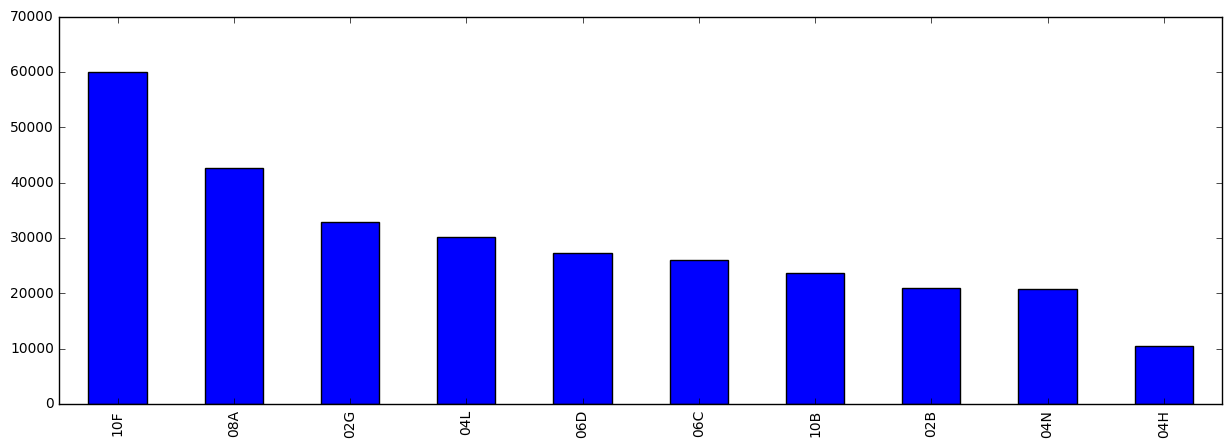

In [43]:
violation_counts[:10].plot(kind='bar')

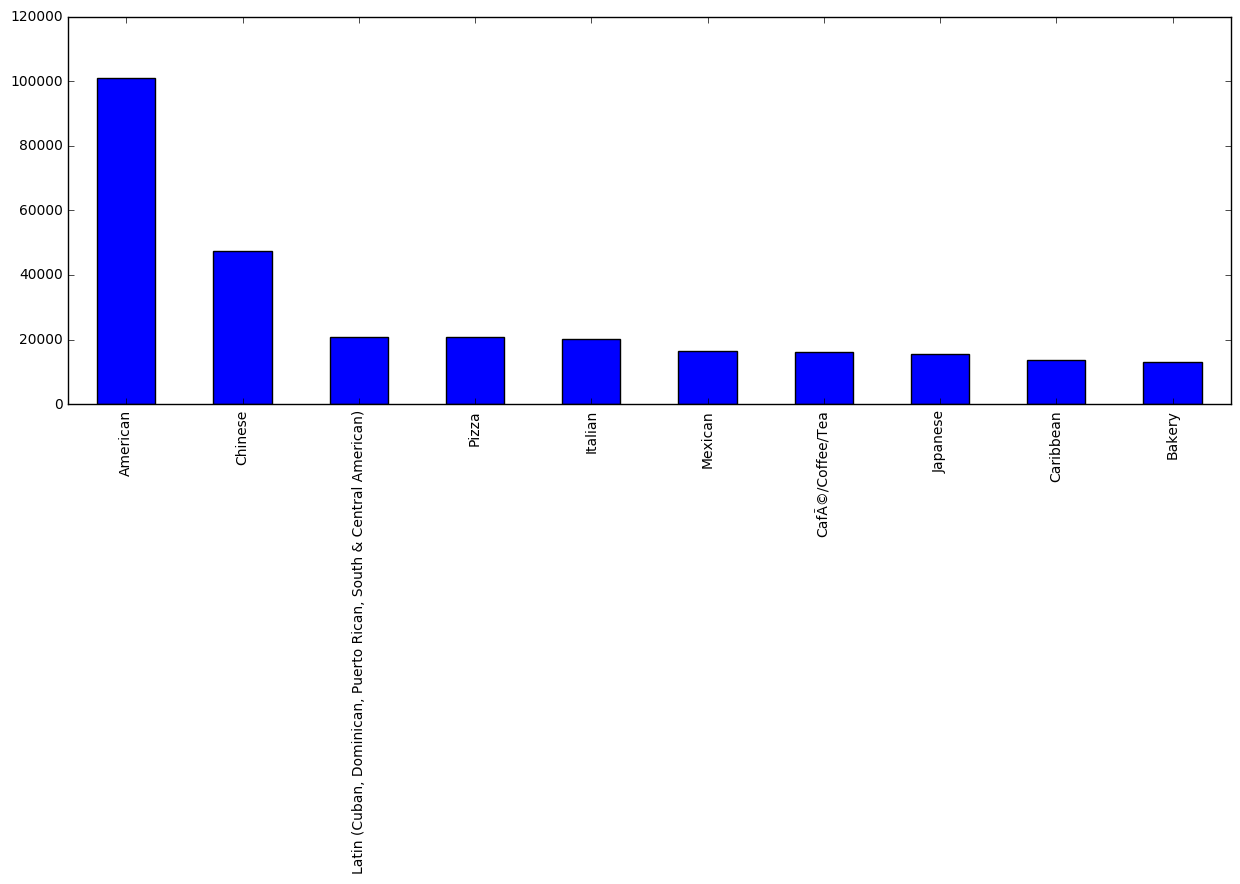

In [44]:
popular = restaurants["CUISINE DESCRIPTION"].value_counts()
popular[:10].plot(kind='bar')

### Using the map command

The map command in Python has the following syntax:

`map(function, [list of values for first argument], [list of values for second argument]...)`

It takes as input a function, which has a set of parameters. Then, it iterates over the lists that follow; the lists contain the arguments that are passed to the function. Map returns a list of values that are the result of applying the function to all the elements of the list(s). 

For example, in the following code, the `add` function is going to be applied to the two lists (`[1, 2, 3, 4]` and `[9, 10, 10, 11]`) that follow. The result of the map will be a list containing the values `[add(1,2), add(2,10), add(3,10), add(4,11)]`




In [ ]:
def capitalize(x):
    return x[0].upper() + x[1:].lower()

example = map(capitalize, ["panos", "christopher", "caterina", "lucy"])
list(example)

In [ ]:
def add(x,y):
    return x+y
    
example = map(add, [1, 2, 3, 4], [9, 10, 10, 11])
list(example)

#### Using the map for dataframes

Using the map command, we can:
* Create new columns for the dataframe
* Modify existing columns
* Generate new columns that are the result of operations on the columns of the dataframe

For example, suppose that we want to format the phone column. We can write a function that takes as input a phone and formats it as we want. Then we apply the function using the map command as follows:

In [ ]:
restaurants['PHONE']

In [ ]:
import re
def formatPhone(phoneString):
    if phoneString == None:
        return ""
    regex = re.compile(r'([2-9]\d{2})\W*(\d{3})\W*(\d{4})')
    match = regex.search(str(phoneString))
    if match:
        area_code = match.group(1)
        first_three = match.group(2)
        last_four = match.group(3)
        formatted = "(" + area_code + ") " + first_three + "-" + last_four
        return formatted
    else:
        return ""

In [ ]:
formatPhone("2129980803")

In [ ]:
restaurants['FormattedPhone'] = restaurants['PHONE'].apply(formatPhone)

In [ ]:
restaurants[['PHONE', 'FormattedPhone']]

In [ ]:
def printAddress(boro, building, street, zipcode, phone):
    if boro == None:
        boro = ""
    if building == None:
        building = ""
    if street == None:
        street = ""
    if zipcode == None:
        zipcode = ""
    if phone == None:
        phone = ""
    
    result = str(building) + " " + street + " " + \
            boro + ", " + zipcode +  ", Phone: " + formatPhone(phone)
    return result

printAddress("Manhattan", "44", "West 4th", "10012", "2129980803")


In [ ]:

restaurants["FormattedAddress"] = list(map(printAddress, 
                                     restaurants["BORO"],
                                     restaurants["BUILDING"],
                                     restaurants["STREET"],
                                     restaurants["ZIPCODE"],
                                     restaurants["PHONE"]))

In [ ]:
restaurants[["FormattedAddress", "STREET", "BUILDING", "BORO"]]


### Selecting rows

To select rows, we can use the following approach, where we generate a list of boolean values, one for each row of the dataframe, and then we use the list to select which of the rows of the dataframe we want to keep"

In [45]:
# Create the condition
mice = (restaurants["VIOLATION CODE"] == "04L")
# Apply the condition to the dataframe "restaurants" and store the result 
# in a dataframe called inspections08A
has_mice = restaurants[mice]
has_mice

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
0,41124964,NEBRASKA STEAKHOUSE,MANHATTAN,15,STONE STREET,10004,2129520620,Steak,2016-11-09,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,25.0,NaN,2016-11-09,2016-11-30,Cycle Inspection / Re-inspection
13,50038366,GOOD TASTE RESTAURANT,BRONX,941A,WESTCHESTER AVE,10459,7185896688,Chinese,2015-07-30,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,20.0,NaN,NaT,2016-11-30,Pre-permit (Operational) / Compliance Inspection
27,41679882,GREEN OLIVE PIZZA,QUEENS,27111,UNION TPKE,11040,7189622365,Pizza,2014-07-16,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,19.0,B,2014-07-16,2016-11-30,Cycle Inspection / Re-inspection
72,41614971,FORTUNE COOKIES,BROOKLYN,9004,AVENUE B,11236,7184980848,Chinese,2016-09-28,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,9.0,A,2016-09-28,2016-11-30,Cycle Inspection / Re-inspection
80,41502571,CHIFA RESTAURANT,QUEENS,7320,NORTHERN BOULEVARD,11372,7188980108,Peruvian,2015-12-02,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,13.0,A,2015-12-02,2016-11-30,Cycle Inspection / Re-inspection
84,50035648,AURA ZOOB ZIB,MANHATTAN,460,9TH AVE,10018,2129718530,Thai,2016-02-22,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,13.0,A,2016-02-22,2016-11-30,Cycle Inspection / Re-inspection
87,41226387,UNIVERSITY MARKET PLACE,MANHATTAN,20,EAST 16 STREET,10003,2129292281,American,2015-03-17,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,13.0,A,2015-03-17,2016-11-30,Cycle Inspection / Re-inspection
97,40722258,SAPPHIRE INDIAN CUISINE,MANHATTAN,1845,BROADWAY,10023,2122454444,Indian,2015-12-09,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,28.0,NaN,NaT,2016-11-30,Cycle Inspection / Initial Inspection
105,40563596,SAHARA RESTAURANT,BROOKLYN,2337,CONEY ISLAND AVENUE,11223,7183768594,Turkish,2014-01-16,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,25.0,NaN,NaT,2016-11-30,Cycle Inspection / Initial Inspection
106,50008598,GRACIE'S ON 2ND,MANHATTAN,300,E 86TH ST,10028,2128799425,American,2014-04-18,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,19.0,NaN,NaT,2016-11-30,Pre-permit (Operational) / Initial Inspection


In [46]:
# List the most frequent DBA values in the inspections08A dataframe
has_mice["DBA"].value_counts()[:10]

SUBWAY                                   293
DUNKIN' DONUTS                           163
CROWN FRIED CHICKEN                      123
KENNEDY FRIED CHICKEN                    113
MCDONALD'S                               110
DOMINO'S                                  99
DUNKIN' DONUTS, BASKIN ROBBINS            89
GOLDEN KRUST CARIBBEAN BAKERY & GRILL     77
POPEYES LOUISIANA KITCHEN                 73
STARBUCKS                                 63
Name: DBA, dtype: int64

And we can use more complex conditions:

In [47]:
mice_manhattan = (restaurants["VIOLATION CODE"] == "04L") \
                    & (restaurants["BORO"] == "MANHATTAN") \
                    & (restaurants["ZIPCODE"] == "10012")

In [48]:
has_mice_10012 = restaurants[mice_manhattan]
has_mice_10012

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
692,41444651,TRIONA'S,MANHATTAN,237,SULLIVAN STREET,10012,2129825222,Irish,2013-09-04,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,17.0,NaN,NaT,2016-11-30,Cycle Inspection / Initial Inspection
3083,50045947,SPRINGBONE KITCHEN,MANHATTAN,90,W 3RD ST,10012,6463689192,American,2016-07-14,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,39.0,NaN,NaT,2016-11-30,Pre-permit (Operational) / Initial Inspection
3997,41557581,MISS LILY'S,MANHATTAN,132,WEST HOUSTON STREET,10012,6465885375,Caribbean,2014-01-07,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,26.0,NaN,NaT,2016-11-30,Cycle Inspection / Initial Inspection
5145,50036370,THE DESSERT KITCHEN,MANHATTAN,192,BLEECKER ST,10012,6469228579,"Ice Cream, Gelato, Yogurt, Ices",2015-11-17,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,19.0,B,2015-11-17,2016-11-30,Cycle Inspection / Re-inspection
7807,41570238,MELVINS MISS LILY'S,MANHATTAN,130,WEST HOUSTON STREET,10012,6465885375,Caribbean,2016-06-03,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,11.0,NaN,NaT,2016-11-30,Cycle Inspection / Initial Inspection
10401,41153301,MACDOUGAL STREET ALE HOUSE,MANHATTAN,122,MACDOUGAL STREET,10012,2122540006,American,2014-05-01,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,19.0,NaN,NaT,2016-11-30,Cycle Inspection / Initial Inspection
10760,41652560,$1 PIZZA $2 BEER,MANHATTAN,95,MACDOUGAL STREET,10012,2122555090,Pizza,2014-02-26,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,14.0,B,2014-02-26,2016-11-30,Cycle Inspection / Re-inspection
11179,41021272,FIORE'S PIZZA,MANHATTAN,165,BLEECKER STREET,10012,2129828663,Pizza,2016-05-03,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,11.0,NaN,NaT,2016-11-30,Cycle Inspection / Initial Inspection
16030,41666685,THE COFFEE BEAN TEA & LEAF,MANHATTAN,189,BLEECKER STREET,10012,2126730050,CafÃ©/Coffee/Tea,2015-09-17,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,13.0,A,2015-09-17,2016-11-30,Cycle Inspection / Re-inspection
17736,41721722,KOPI KOPI,MANHATTAN,68,WEST 3 STREET,10012,2127777285,Indonesian,2014-10-22,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,13.0,NaN,NaT,2016-11-30,Cycle Inspection / Initial Inspection


In [50]:
has_mice_10012["DBA"].value_counts()[:20]

MELVINS MISS LILY'S           9
TRIONA'S                      8
MEXICAN RADIO                 8
VIN ET FLEURS                 8
KOPI KOPI                     7
JACQUES 1534                  7
DOJO RESTAURANT               7
THE VILLAGE LANTERN           7
LASSO                         7
THE COFFEE BEAN TEA & LEAF    7
OLD TBILISI                   7
MONTE'S                       7
CAFE ESPANOL                  6
VESUVIO BAKERY                6
PORTO BELLO RESTAURANT        6
TARTINERY                     6
A.B. BIAGI                    6
PERCY'S PIZZA                 6
$1 PIZZA $2 BEER              5
TOMOE SUSHI                   5
Name: DBA, dtype: int64

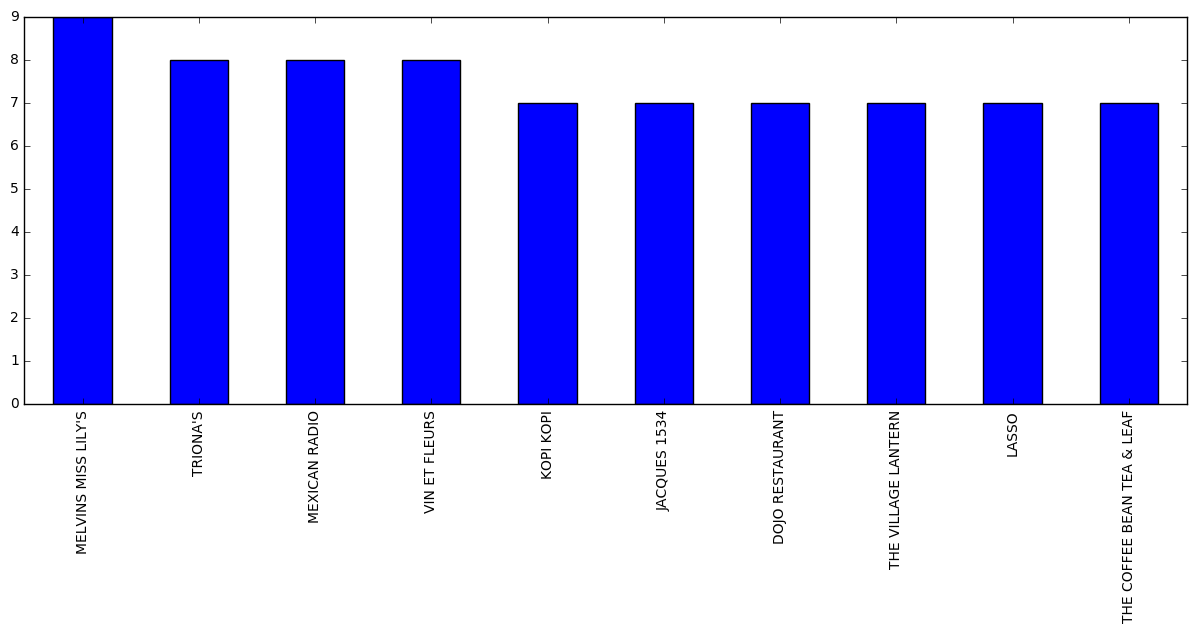

In [51]:
has_mice_10012["DBA"].value_counts()[:10].plot(kind='bar')

In [ ]:
restaurants[["VIOLATION CODE", "VIOLATION DESCRIPTION"]]

### Plotting

In [52]:
# We need to convert the "SCORE" column to a numeric data type (just in case the related part was not executed above)
restaurants["SCORE"] = pd.to_numeric(restaurants["SCORE"])

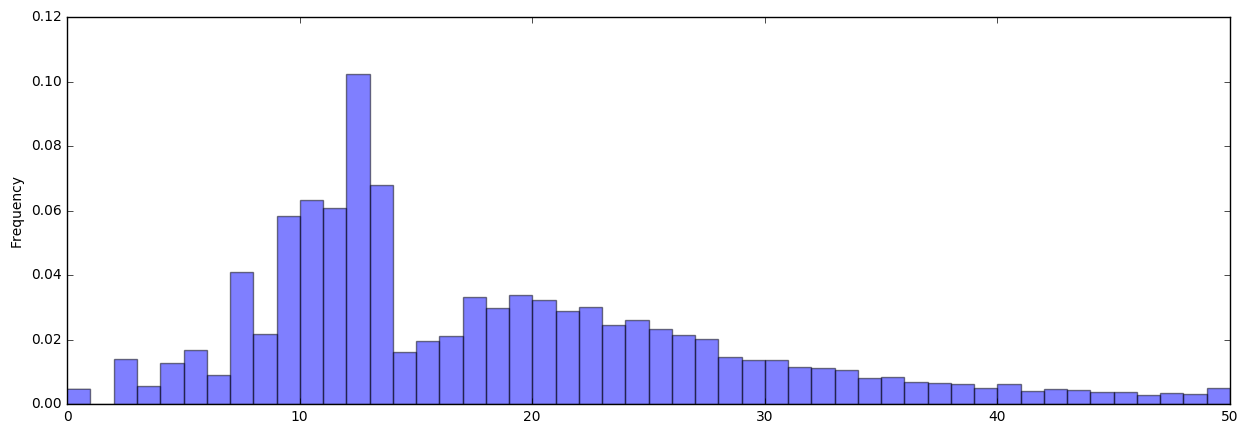

In [55]:
# We can plot a histogram of the scores using the plot(kind='hist') command
restaurants["SCORE"].plot(kind='hist', # histogram
                          bins=50, # use 50 bars
                          alpha=0.5, # add a bit of transparency
                          range=(0,50), # x-axis from 0 to 50
                          color='Blue', # use blue color
                          normed=True) # show raw count, normed = False

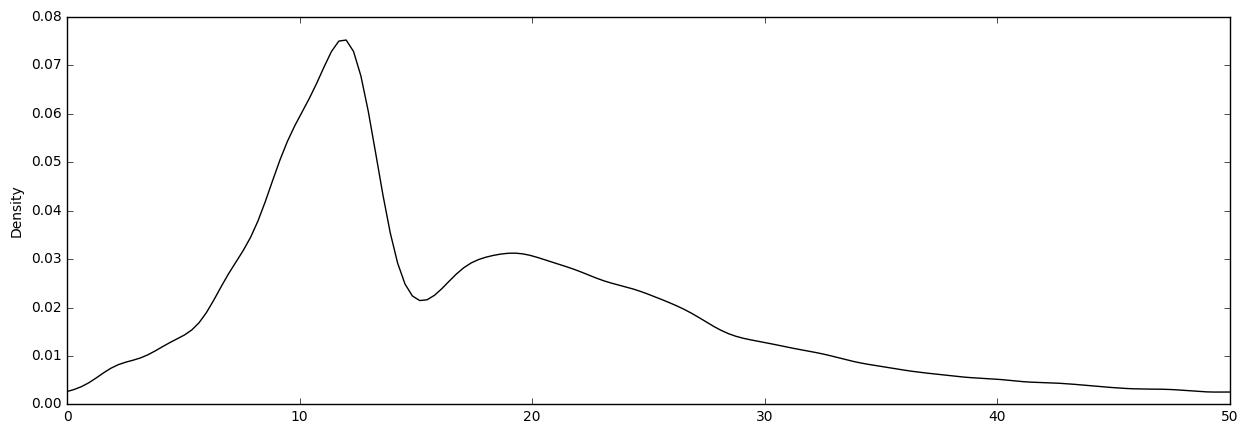

In [56]:
# This plots the density of a numeric attribute
restaurants["SCORE"].plot(kind='kde', color='Black', xlim=(0,50))

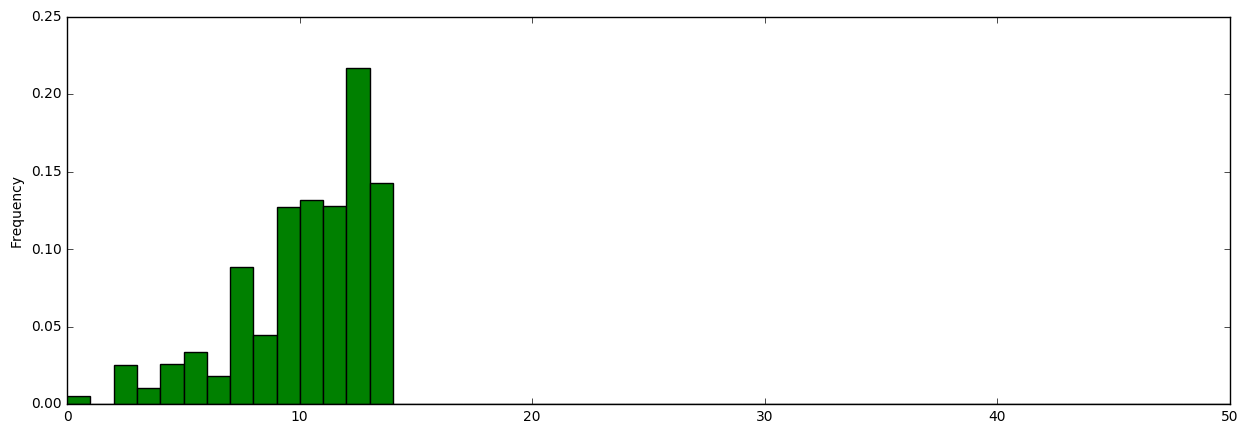

In [58]:
restaurants["SCORE"][ restaurants["GRADE"] == 'A' ].plot(kind = 'hist', bins=50, range=(0,50), color='Green', normed=True)

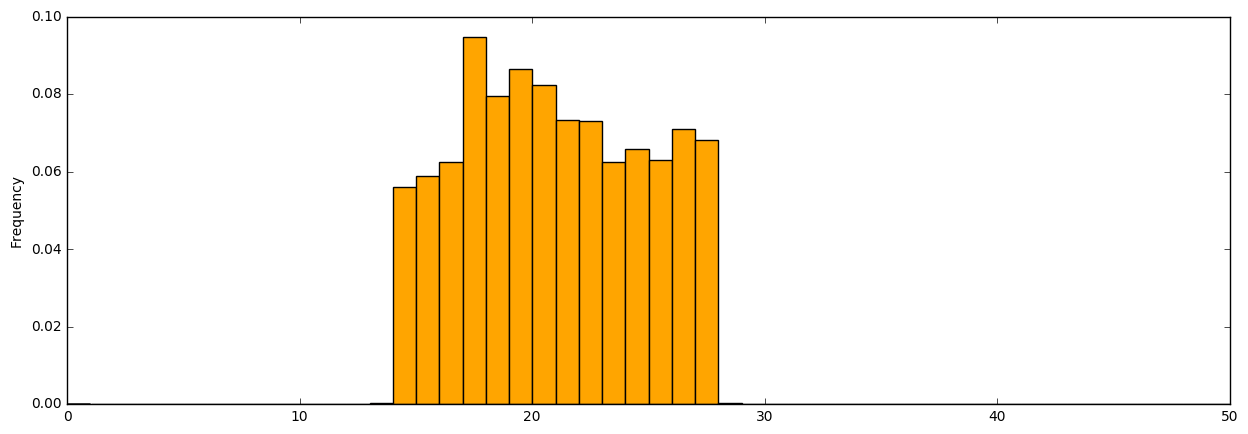

In [59]:
restaurants["SCORE"][ restaurants["GRADE"] == 'B' ].plot(kind = 'hist', bins=50, range=(0,50), color='Orange', normed=True)


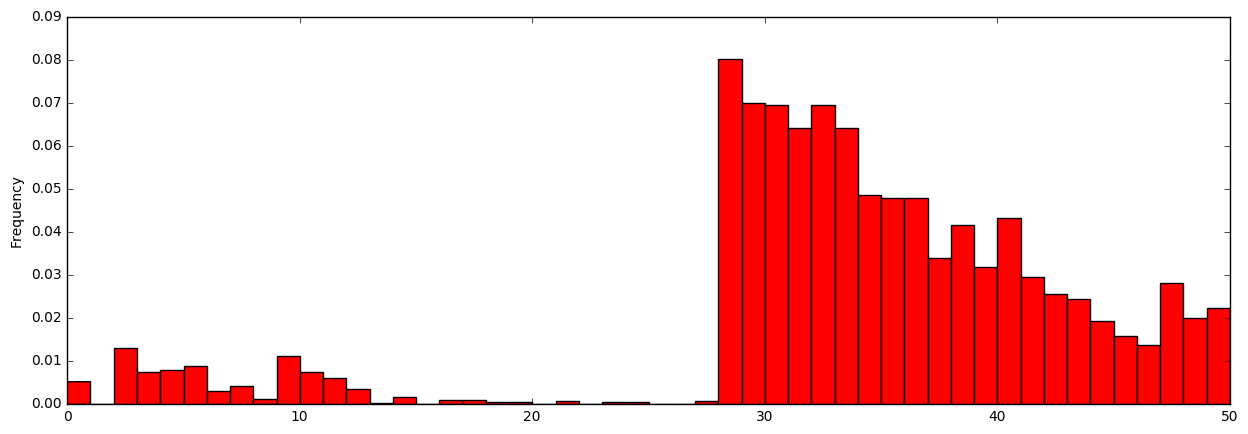

In [60]:
restaurants["SCORE"][ restaurants["GRADE"] == 'C' ].plot(kind = 'hist', bins=50, range=(0,50), color='Red', normed=True)

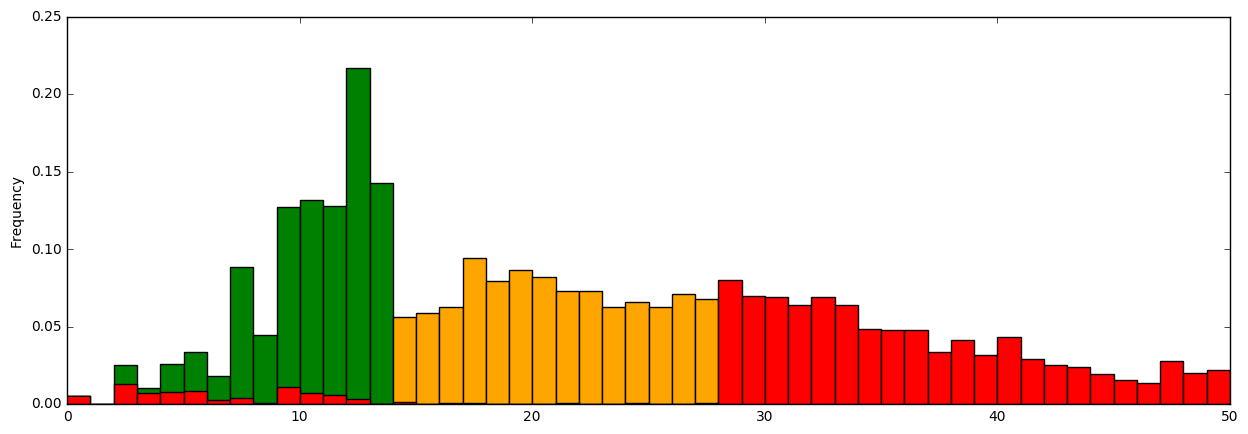

In [57]:
# We can also select specific rows to plot (e.g., in this case based on grade)
# Jupyter is smart enough to combine these three plots in one 
# (sometimes it is not smart, below we show how to make our desire to combine plots explicit)
restaurants["SCORE"][ restaurants["GRADE"] == 'A' ].plot(kind = 'hist', bins=50, range=(0,50), color='Green', normed=True)
restaurants["SCORE"][ restaurants["GRADE"] == 'B' ].plot(kind = 'hist', bins=50, range=(0,50), color='Orange', normed=True)
restaurants["SCORE"][ restaurants["GRADE"] == 'C' ].plot(kind = 'hist', bins=50, range=(0,50), color='Red', normed=True)

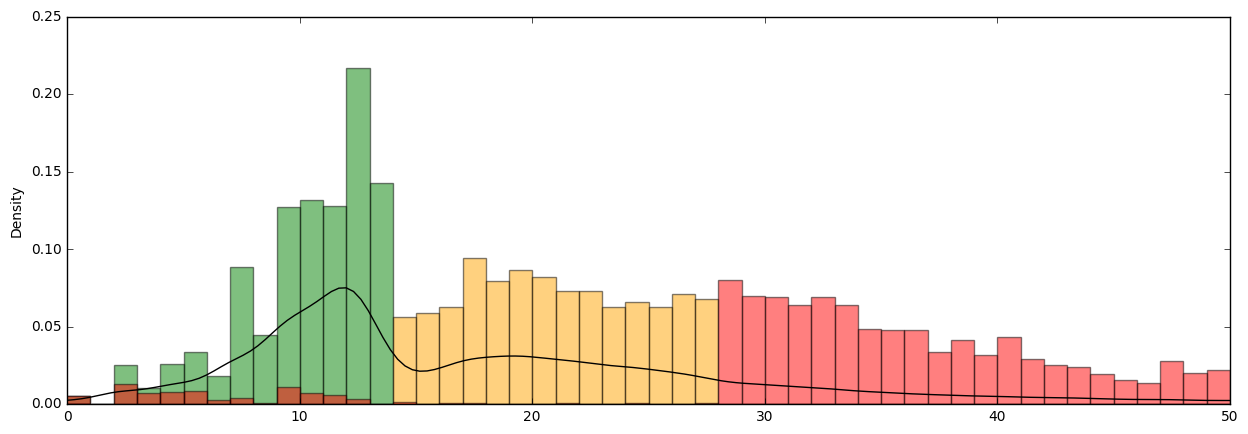

In [61]:
ax1 = restaurants["SCORE"][ restaurants["GRADE"] == 'A' ].plot(kind = 'hist',bins=50, alpha=0.5, range=(0,50), color='Green', normed=True)
ax2 = restaurants["SCORE"][ restaurants["GRADE"] == 'B' ].plot(kind = 'hist',bins=50, alpha=0.5, range=(0,50), color='Orange', normed=True, ax=ax1)
ax3 = restaurants["SCORE"][ restaurants["GRADE"] == 'C' ].plot(kind = 'hist',bins=50, alpha=0.5, range=(0,50), color='Red', normed=True, ax=ax2)
restaurants["SCORE"].plot(kind='kde', color='Black', xlim=(0,50), ax=ax3)

### Comparison with SQL

For a comparison with SQL, see http://pandas.pydata.org/pandas-docs/stable/comparison_with_sql.html

Pandas supports its own set of operators for doing SQL-like operations (in reality it runs a in-memory SQL database in the backend). It is also possible to use straightforward SQL queries to query Pandas dataframes, by using the `pandasql` package:

In [ ]:
# !sudo -H pip install -U pandasql

In [ ]:
from pandasql import sqldf

In [ ]:
# PandaSQL does not like column names with spaces. So we will rename (some of) them.
restaurants.rename(columns={"VIOLATION CODE": "VIOLATION"}, inplace = True)

In [ ]:
rest = restaurants[["DBA", "BORO", "VIOLATION", "SCORE"]]

In [ ]:
q  = """
SELECT BORO, VIOLATION, COUNT(*) AS CNT 
FROM
  rest
GROUP BY BORO, VIOLATION
ORDER BY CNT DESC
LIMIT 20;
"""

df = sqldf(q, globals())

In [ ]:
df

In [ ]:
q  = """
SELECT SCORE, COUNT(*) AS CNT 
FROM
  rest
GROUP BY SCORE
ORDER BY SCORE
"""

df = sqldf(q, globals())

In [ ]:
df

In [ ]:
df.plot(kind='scatter', s=50, x="SCORE", y="CNT", xlim=(0,30))